<h1 align="center"> Part 1: Getting Time Series Data and Plotting</h1>

This code demonstrates how to view time series data with pandas and various methods of sampling, smoothing (rolling mean), and applying linear regression to the data. 

**if this tutorial doesn't cover what you are looking for, please leave a comment on the youtube video and I will try to cover what you are interested in.**

https://www.youtube.com/watch?v=OwnaUVt6VVE

<h3 align='Left'> Importing Libraries</h3>

In [2]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

<h3 align='Left'> Getting Data and Viewing with Pandas </h3>

In [9]:
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
google = web.DataReader('GOOG', data_source = 'google', start = '3/14/2009', end = '4/14/2016')
google = google.drop('Volume', axis = 1 )
google.head()

,Open,High,Low,Close
Date,,,,
2009-03-16,162.83,164.70,159.14,159.69
2009-03-17,159.93,167.50,159.39,167.50
2009-03-18,167.24,169.83,163.86,166.38
2009-03-19,165.67,167.83,163.53,164.81
2009-03-20,164.98,166.33,163.01,164.91


In [10]:
google.index.values

array(['2009-03-16T00:00:00.000000000', '2009-03-17T00:00:00.000000000',
       '2009-03-18T00:00:00.000000000', ...,
       '2016-04-12T00:00:00.000000000', '2016-04-13T00:00:00.000000000',
       '2016-04-14T00:00:00.000000000'], dtype='datetime64[ns]')

<h3 align='Left'> Adding Column </h3>

In [11]:
google['Ticks'] = range(0,len(google.index.values))

In [12]:
google.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2009-03-16,162.83,164.70,159.14,159.69,0
2009-03-17,159.93,167.50,159.39,167.50,1
2009-03-18,167.24,169.83,163.86,166.38,2
2009-03-19,165.67,167.83,163.53,164.81,3
2009-03-20,164.98,166.33,163.01,164.91,4


<h3 align='Left'> Plotting Ticks vs Open Price</h3>

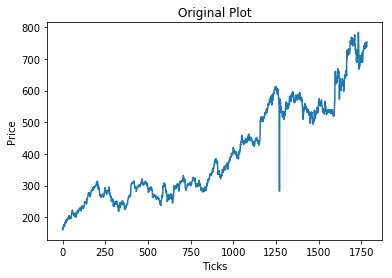

In [21]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('Ticks', 'Open', data = google);

<h3 align='Left'> Sampling 1/10th of the Data</h3>

In [22]:
one_tenth = google.sample(frac = .1, random_state=np.random.randint(10))

In [23]:
one_tenth.head()

,Open,High,Low,Close,Ticks
Date,,,,,
2011-08-18,261.47,262.18,249.99,252.19,612
2011-03-17,281.96,284.22,279.99,280.40,505
2011-03-14,286.11,288.86,283.73,284.71,502
2012-05-16,308.67,314.73,307.66,314.15,799
2013-07-15,461.69,463.54,457.72,461.88,1089


<h3 align='Left'>Reordering Data by Ticks Value</h3>

In [24]:
# removing index name
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['Ticks'], ascending=[True])
one_tenth.head()

,Open,High,Low,Close,Ticks
2009-03-19,165.67,167.83,163.53,164.81,3
2009-03-20,164.98,166.33,163.01,164.91,4
2009-03-25,175.02,175.49,167.96,171.86,7
2009-05-07,201.85,202.29,196.05,198.11,37
2009-06-11,215.67,216.65,213.97,214.29,61


<h3 align='Left'> Plotting Ticks vs Open Price on Sampled Data</h3>

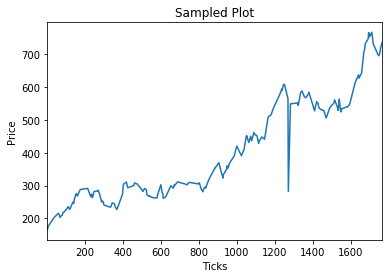

In [25]:
axes = one_tenth.plot('Ticks', 'Open', legend = False, title = 'Sampled Plot');
axes.legend = None;
axes.set_ylabel('Price');

<h3 align='Left'> Plotting Original Data vs Sampled Data (Subplot)</h3>

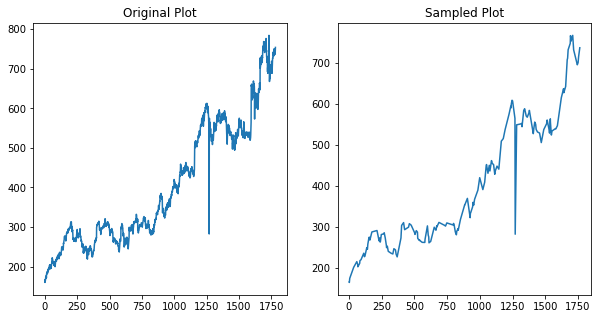

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('Ticks', 'Open', data = google);
axes[0].set_title('Original Plot');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled Plot');

<h3 align='Left'> Change the Index From Date to Ticks</h3>

In [27]:
#google.index = google['Ticks']
# Removing Index
google = google.reset_index()
google.head(3)

,Date,Open,High,Low,Close,Ticks
0,2009-03-16,162.83,164.70,159.14,159.69,0
1,2009-03-17,159.93,167.50,159.39,167.50,1
2,2009-03-18,167.24,169.83,163.86,166.38,2


<h3 align='Left'> Plotting Original Data vs Sampled vs Rolling Mean Plot (Subplot)</h3>

In [28]:
# documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
google['Rolling_Mean'] = google['Open'].rolling(window = 80).mean()
google.head(5)

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
0,2009-03-16,162.83,164.70,159.14,159.69,0,NaN
1,2009-03-17,159.93,167.50,159.39,167.50,1,NaN
2,2009-03-18,167.24,169.83,163.86,166.38,2,NaN
3,2009-03-19,165.67,167.83,163.53,164.81,3,NaN
4,2009-03-20,164.98,166.33,163.01,164.91,4,NaN


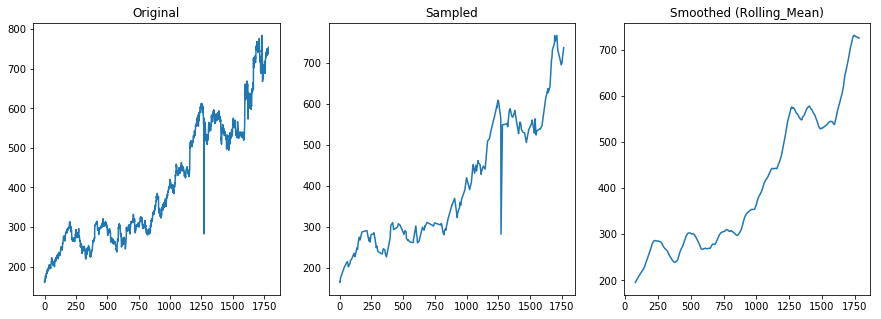

In [29]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('Ticks', 'Open', data = google);
axes[0].set_title('Original');
axes[1].plot('Ticks', 'Open', data = one_tenth);
axes[1].set_title('Sampled');
axes[2].plot('Ticks', 'Rolling_Mean', data = google);
axes[2].set_title('Smoothed (Rolling_Mean)');

<h3 align='Left'>Plotting Original Data and Smoothed Data on Same Plot</h3>

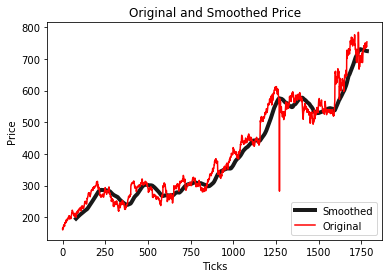

In [30]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(google['Ticks'], google['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(google['Ticks'], google['Open'], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

<h3 align='Left'>Plotting Original Data and Smoothed Data on Same Plot, but with Date as x axis</h3>

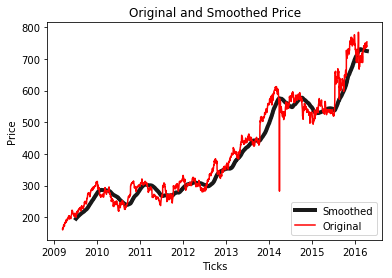

In [31]:
# Almost exactly the code as above but with datetime
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(google['Date'], google['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(google['Date'], google['Open'], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [32]:
# Plotting Date works best with datetime as the type. 
type(google['Date'].values[0])

numpy.datetime64

<h3 align='Left'>Getting Data Only from Tick 800 to 1200</h3>

In [33]:
filt_google = google[(google['Ticks'] >= 800) & (google['Ticks'] <= 1200)]

In [34]:
filt_google.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean
800,2012-05-17,316.60,318.61,310.30,311.21,800,306.568375
801,2012-05-18,312.24,315.89,298.05,299.90,801,306.865500
802,2012-05-21,299.96,307.54,299.70,306.75,802,307.043750
803,2012-05-22,306.41,306.60,297.70,300.10,803,307.310125
804,2012-05-23,300.52,304.50,298.26,304.43,804,307.457375


<h3 align='Left'>Linear Regression</h3>

In [35]:
from sklearn.linear_model import LinearRegression

In [37]:
model = LinearRegression().fit(filt_google[['Ticks']], filt_google[['Rolling_Mean']])
m = model.coef_[0]
b = model.intercept_
#equation of the line
print ('y = ', round(m[0],2), 'x + ', round(b[0],2))

y =  0.48 x +  -100.16


In [38]:
# using the equation of the line to get y values
predictions = model.predict(filt_google[['Ticks']])
predictions[0:5]

array([[ 280.99658148],
       [ 281.47302422],
       [ 281.94946697],
       [ 282.42590971],
       [ 282.90235246]])

In [39]:
# making a DataFrame for the predictions
predictions = pd.DataFrame(data = predictions, index = filt_google.index.values, columns = ['Pred'])
predictions.head()

,Pred
800,280.996581
801,281.473024
802,281.949467
803,282.425910
804,282.902352


<h3 align='Left'>Joining the Two DataFrames</h3>

In [157]:
# join and concat documentation
# http://pandas.pydata.org/pandas-docs/stable/merging.html

joined_df = filt_google.join(predictions, how = 'inner')
joined_df.head()

,Date,Open,High,Low,Close,Ticks,Rolling_Mean,Pred
800,2012-05-17,316.60,318.61,310.30,311.21,800,306.568375,280.996581
801,2012-05-18,312.24,315.89,298.05,299.90,801,306.865500,281.473024
802,2012-05-21,299.96,307.54,299.70,306.75,802,307.043750,281.949467
803,2012-05-22,306.41,306.60,297.70,300.10,803,307.310125,282.425910
804,2012-05-23,300.52,304.50,298.26,304.43,804,307.457375,282.902352


<h3 align='Left'>Plotting the Values Based on the Equation vs the Rolling Mean</h3>

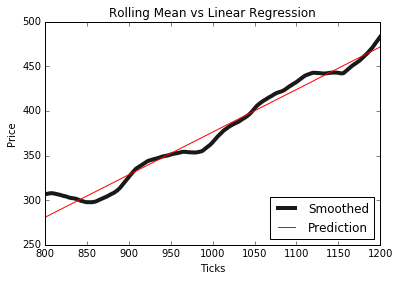

In [159]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(joined_df['Ticks'], joined_df['Rolling_Mean'], color = (0,0,0), linewidth = 4, alpha = .9, label = 'Smoothed');
ax.plot(joined_df['Ticks'], joined_df['Pred'], color = (1,0,0), label = 'Prediction');
ax.set_title('Rolling Mean vs Linear Regression')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

In [160]:
# documentation 
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html+
import sklearn

r_squared = sklearn.metrics.r2_score(joined_df['Rolling_Mean'],joined_df['Pred'],multioutput='uniform_average')
r_squared

0.97617654301753054